In [141]:
# CS 513: Knowledge Discovery and Data 
# Project: Digital Stress Classifier — RF, ANN, SVM
# Author: Raj Rana
# "I pledge my honor that I have abided by the Stevens Honor System"
# 
# Purpose:
# This notebook extends the digital stress classifier pipeline to three additional models:
#   • Random Forest
#   • Artificial Neural Network (ANN)
#   • Support Vector Machine (SVM)
# using the preprocessed df_modified dataset (data/df_modified.csv).


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sns.set(style="whitegrid", context="notebook")


In [143]:
# Load preprocessed digital stress dataset
# Make sure df_modified.csv is saved in the `data/` directory.
df = pd.read_csv("data/Digital_Stress_Classifier_preprocess.csv")
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Stress_Binary,Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,1.110090,-1.427055,0.456182,-0.611571,1.832943,1.073037,1,0,1,0,1,0,0,0,0,0
1,-0.298363,-0.247258,0.456182,1.001936,0.406841,1.073037,1,0,0,1,0,0,1,0,0,0
2,-1.002590,1.109509,-0.203486,-1.149407,0.406841,-1.584773,1,0,0,1,0,0,0,0,0,1
3,0.305259,0.106681,0.456182,-1.149407,-1.019260,-0.255868,1,1,0,0,0,0,0,1,0,0
4,0.104052,0.873549,-1.522823,1.001936,-1.019260,-0.255868,1,1,0,0,0,0,0,0,1,0


In [144]:
# Separate features and target
X = df.drop("Stress_Binary", axis=1)
y = df["Stress_Binary"]

X.head()


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,1.110090,-1.427055,0.456182,-0.611571,1.832943,1.073037,0,1,0,1,0,0,0,0,0
1,-0.298363,-0.247258,0.456182,1.001936,0.406841,1.073037,0,0,1,0,0,1,0,0,0
2,-1.002590,1.109509,-0.203486,-1.149407,0.406841,-1.584773,0,0,1,0,0,0,0,0,1
3,0.305259,0.106681,0.456182,-1.149407,-1.019260,-0.255868,1,0,0,0,0,0,1,0,0
4,0.104052,0.873549,-1.522823,1.001936,-1.019260,-0.255868,1,0,0,0,0,0,0,1,0


In [145]:
# Train–test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((347, 15), (149, 15))

In [146]:
def evaluate_model(name, y_true, y_pred):
    """Prints accuracy, confusion matrix, and classification report."""
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} Accuracy: {acc:.4f} ({acc:.2%})\n")
    
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

## Random Forest Classifier

Random Forest training time: 1.20 seconds
Random Forest Accuracy: 0.8859 (88.59%)

Confusion Matrix:
[[ 23  12]
 [  5 109]]


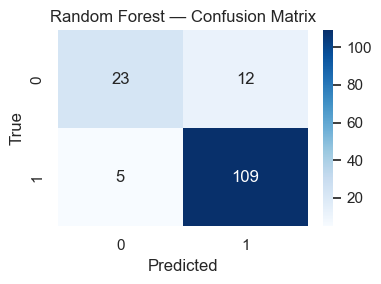


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.90      0.96      0.93       114

    accuracy                           0.89       149
   macro avg       0.86      0.81      0.83       149
weighted avg       0.88      0.89      0.88       149



In [147]:
# Train Random Forest model with timing
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_train_time = time.time() - start_time
print(f"Random Forest training time: {rf_train_time:.2f} seconds")

rf_pred = rf_model.predict(X_test)

evaluate_model("Random Forest", y_test, rf_pred)


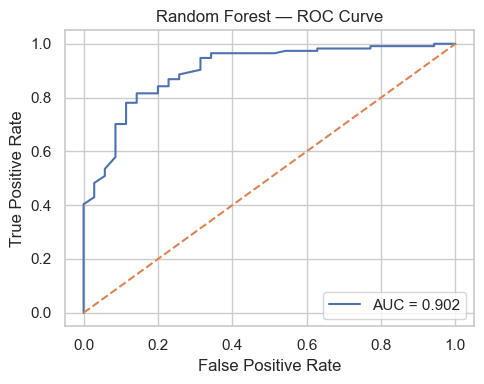

Random Forest AUC: 0.9020


In [148]:
# Random Forest ROC curve and AUC
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # probability of class 1

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest — ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")

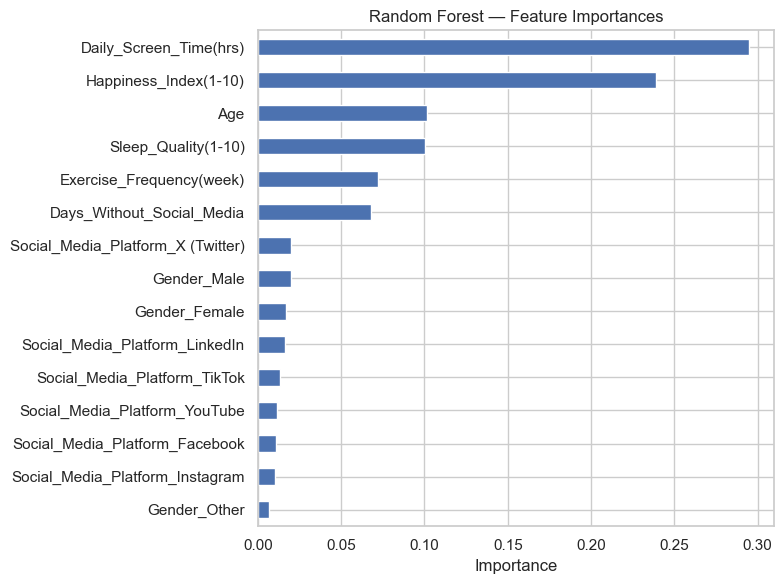

Daily_Screen_Time(hrs)               0.295107
Happiness_Index(1-10)                0.239280
Age                                  0.101286
Sleep_Quality(1-10)                  0.100486
Exercise_Frequency(week)             0.071854
Days_Without_Social_Media            0.067621
Social_Media_Platform_X (Twitter)    0.019863
Gender_Male                          0.019598
Gender_Female                        0.016587
Social_Media_Platform_LinkedIn       0.016025
Social_Media_Platform_TikTok         0.013530
Social_Media_Platform_YouTube        0.011539
Social_Media_Platform_Facebook       0.010722
Social_Media_Platform_Instagram      0.010069
Gender_Other                         0.006434
dtype: float64

In [149]:
# Feature importances for Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importances = rf_importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
rf_importances.plot(kind="barh")
plt.title("Random Forest — Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

rf_importances.sort_values(ascending=False)

## Support Vector Machine (SVM)

SVM training time: 0.05 seconds
SVM (RBF kernel) Accuracy: 0.8792 (87.92%)

Confusion Matrix:
[[ 23  12]
 [  6 108]]


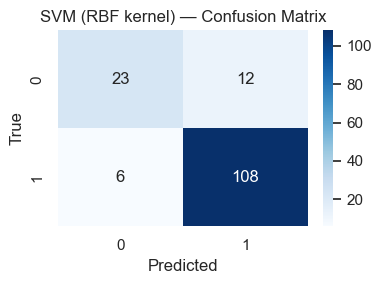


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.90      0.95      0.92       114

    accuracy                           0.88       149
   macro avg       0.85      0.80      0.82       149
weighted avg       0.87      0.88      0.88       149



In [ ]:
# Train Support Vector Machine with RBF kernel (with timing)
start_time = time.time()

svm_model = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    random_state=42
)

svm_model.fit(X_train, y_train)

svm_train_time = time.time() - start_time
print(f"SVM training time: {svm_train_time:.2f} seconds")

svm_pred = svm_model.predict(X_test)

evaluate_model("SVM", y_test, svm_pred)


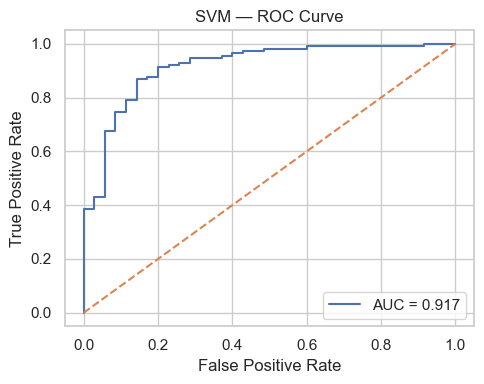

SVM AUC: 0.9165


In [151]:
# SVM ROC curve and AUC using decision_function scores
svm_scores = svm_model.decision_function(X_test)  # distance from the hyperplane

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(5, 4))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM — ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"SVM AUC: {roc_auc_svm:.4f}")


In [152]:
# Summary comparison across models
rf_acc = accuracy_score(y_test, rf_pred)
ann_acc = accuracy_score(y_test, ann_pred)
svm_acc = accuracy_score(y_test, svm_pred)

summary_df = pd.DataFrame({
    "Model": ["Random Forest", "ANN", "SVM"],
    "Accuracy": [rf_acc, ann_acc, svm_acc],
    "AUC": [roc_auc_rf, roc_auc_ann, roc_auc_svm],
    "Train time (sec)": [rf_train_time, ann_train_time, svm_train_time]
})

summary_df


,Model,Accuracy,AUC,Train time (sec)
0,Random Forest,0.885906,0.902005,1.203412
1,ANN,0.832215,0.877945,2.480945
2,SVM,0.879195,0.916541,0.047002
